<a href="https://colab.research.google.com/github/leman-cap13/DL_projects/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lmanqasml","key":"2d851a4eb9cae06770577185722326e0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/face-mask-detection


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection
License(s): CC0-1.0
 98% 391M/398M [00:01<00:00, 293MB/s]
100% 398M/398M [00:01<00:00, 377MB/s]


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('/content/face-mask-detection.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import tensorflow as tf

In [ ]:
!ls /content/

annotations  face-mask-detection.zip  images  kaggle.json  sample_data


In [ ]:
import os
import xml.etree.ElementTree as ET

annotations_dir = '/content/annotations'
image_classes = {}

for annotation_file in os.listdir(annotations_dir):
    if annotation_file.endswith('.xml'):
        file_path = os.path.join(annotations_dir, annotation_file)
        tree = ET.parse(file_path)
        root = tree.getroot()

        image_name = root.find('filename').text
        # Assuming each image has at least one object, and we take the first object's class
        # More complex handling might be needed for multiple objects per image
        obj = root.find('object')
        if obj is not None:
            class_name = obj.find('name').text
            image_classes[image_name] = class_name


print("Examples of image filenames and their classes:")
for img_name, class_name in list(image_classes.items())[:10]:
    print(f"{img_name}: {class_name}")

Examples of image filenames and their classes:
maksssksksss344.png: with_mask
maksssksksss456.png: with_mask
maksssksksss11.png: mask_weared_incorrect
maksssksksss399.png: with_mask
maksssksksss688.png: with_mask
maksssksksss67.png: with_mask
maksssksksss315.png: with_mask
maksssksksss614.png: with_mask
maksssksksss191.png: with_mask
maksssksksss121.png: without_mask


In [ ]:
import os

image_dir = '/content/images'
classes = set(image_classes.values())

for class_name in classes:
    class_dir = os.path.join(image_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

print("Created directories for the following classes:")
for class_name in classes:
    print(class_name)

Created directories for the following classes:
without_mask
with_mask
mask_weared_incorrect


In [ ]:
import os
import shutil

image_dir = '/content/images'

for image_name, class_name in image_classes.items():
    src_path = os.path.join(image_dir, image_name)
    dest_dir = os.path.join(image_dir, class_name)
    dest_path = os.path.join(dest_dir, image_name)

    # Check if the image file exists before attempting to move
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
    else:
        print(f"Warning: Image file not found at {src_path}")

print("Images organized into class directories.")

Images organized into class directories.


#Tensorflow

In [ ]:
data_dir='/content/images'
img_size=(224,224)
train_data=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=32)

valid_data=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=32
)

Found 853 files belonging to 3 classes.
Using 683 files for training.
Found 853 files belonging to 3 classes.
Using 170 files for validation.


In [ ]:
class_names=train_data.class_names
class_names

['mask_weared_incorrect', 'with_mask', 'without_mask']

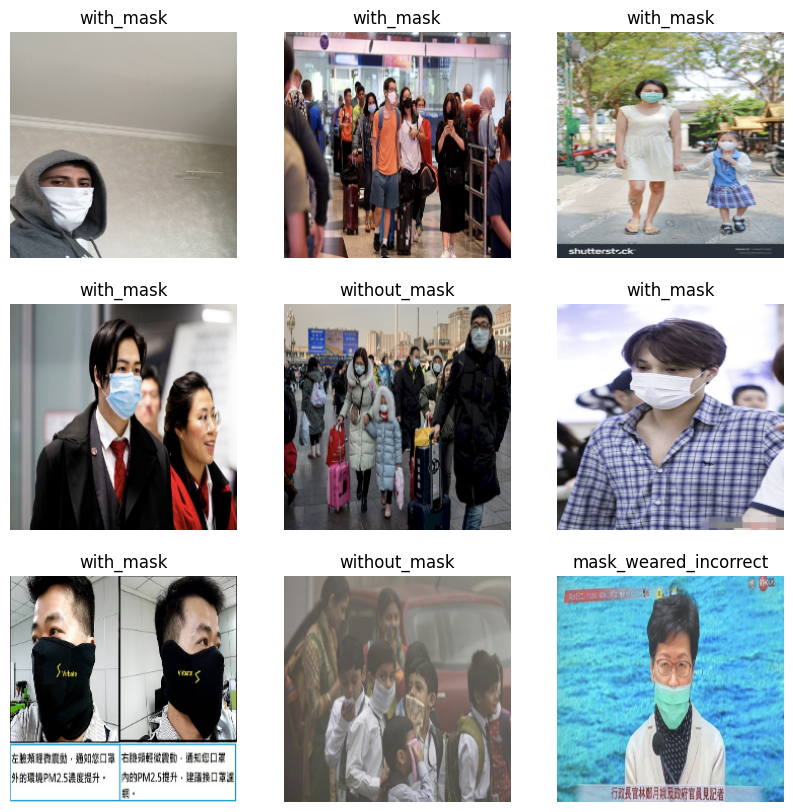

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_data.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
for images, labels in train_data.take(1):
    print(labels.numpy())


In [ ]:

model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(256,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.3323 - loss: 1.5709 - val_accuracy: 0.8353 - val_loss: 0.8352
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 411ms/step - accuracy: 0.4389 - loss: 1.1655 - val_accuracy: 0.8353 - val_loss: 0.8323
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - accuracy: 0.5102 - loss: 1.0309 - val_accuracy: 0.8294 - val_loss: 0.5623
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 308ms/step - accuracy: 0.5686 - loss: 0.9267 - val_accuracy: 0.8294 - val_loss: 0.5762
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 361ms/step - accuracy: 0.6181 - loss: 0.8686 - val_accuracy: 0.7235 - val_loss: 0.7059
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.6377 - loss: 0.8132 - val_accuracy: 0.7588 - val_loss: 0.7396
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 368ms/step - accuracy: 0.7251 - loss: 0.7200 - val_accuracy: 0.6588 - val_loss: 0.9191
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.7378 - loss: 0.6694 - val_accuracy: 0

In [ ]:
#Data Augmentation

data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomTranslation(0.2,0.2)
])

In [ ]:
#Transfer Learning

inputs=tf.keras.Input(shape=(224,224,3))

data_aug=data_augmentation(inputs)

res=tf.keras.layers.Resizing(224,224)(data_aug)
res=tf.keras.layers.Rescaling(1./255)(res)

x=tf.keras.applications.xception.preprocess_input(res)
base_model=tf.keras.applications.xception.Xception(include_top=False,weights='imagenet', input_tensor=x)

base_model.trainable=True
for layer in base_model.layers[:100]:
  layer.trainable=False

avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x=tf.keras.layers.Dense(128,activation='relu')(avg)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.2)(x)
output=tf.keras.layers.Dense(3,activation='softmax')(x)

model1=tf.keras.Model(inputs=inputs,outputs=output)


In [ ]:
initial_learning_rate = 0.001
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
model1.fit(
    train_data,
    validation_data=valid_data,
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 485ms/step - accuracy: 0.4371 - loss: 1.1687 - val_accuracy: 0.8353 - val_loss: 0.8962
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 438ms/step - accuracy: 0.6953 - loss: 0.9102 - val_accuracy: 0.8353 - val_loss: 0.7303
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 383ms/step - accuracy: 0.8311 - loss: 0.7136 - val_accuracy: 0.8353 - val_loss: 0.5887
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 355ms/step - accuracy: 0.8013 - loss: 0.6421 - val_accuracy: 0.8353 - val_loss: 0.5466
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 385ms/step - accuracy: 0.8231 - loss: 0.5752 - val_accuracy: 0.8353 - val_loss: 0.5375
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 378ms/step - accuracy: 0.8071 - loss: 0.5879 - val_accuracy: 0.8353 - val_loss: 0.5402
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 459ms/step - accuracy: 0.8128 - loss: 0.5837 - val_accuracy: 0.8353 - val_loss: 0.5498
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 482ms/step - accuracy: 0.8243 - loss: 0.5822 - val_accur

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 383ms/step - accuracy: 0.8193 - loss: 0.5708 - val_accuracy: 0.8353 - val_loss: 0.5436
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 457ms/step - accuracy: 0.8142 - loss: 0.5803 - val_accuracy: 0.8353 - val_loss: 0.5354
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 373ms/step - accuracy: 0.8182 - loss: 0.5739 - val_accuracy: 0.8353 - val_loss: 0.5339
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 380ms/step - accuracy: 0.8281 - loss: 0.5486 - val_accuracy: 0.8353 - val_loss: 0.5360
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 394ms/step - accuracy: 0.8252 - loss: 0.5692 - val_accuracy: 0.8353 - val_loss: 0.5503
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 557ms/step - accuracy: 0.8285 - loss: 0.5286 - val_accuracy: 0.8353 - val_loss: 0.5487
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 576ms/step - accuracy: 0.8269 - loss: 0.5257 - val_accuracy: 0.8353 - val_loss: 0.5308
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 326ms/step - accuracy: 0.8125 - loss: 0.5693 - val_accurac

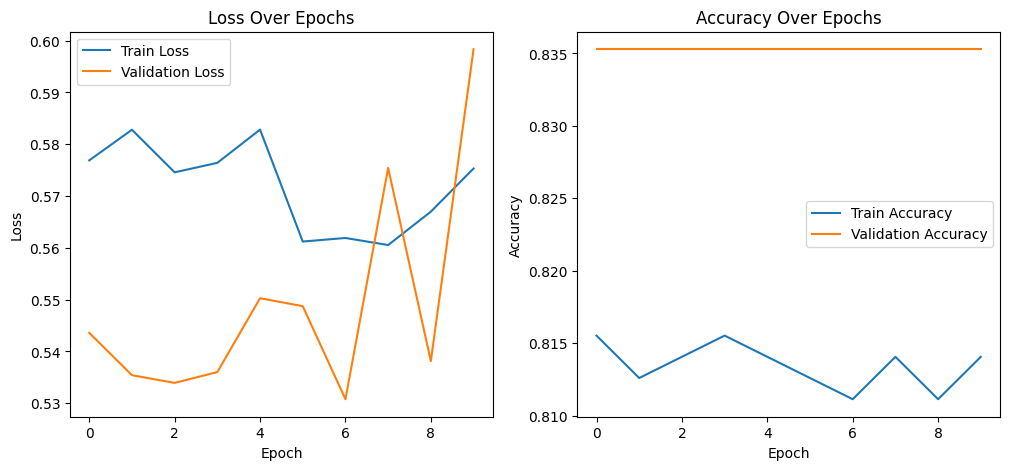

In [ ]:
import matplotlib.pyplot as plt

history = model1.fit(
    train_data,
    validation_data=valid_data,
    epochs=10,
    callbacks=[early_stopping]
)

# Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = []
y_pred = []

for images, labels in valid_data:
    preds = model1.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
                       precision    recall  f1-score   support

mask_weared_incorrect       0.00      0.00      0.00         6
            with_mask       0.84      1.00      0.91       142
         without_mask       0.00      0.00      0.00        22

             accuracy                           0.84       170
            macro avg       0.28      0.33      0.30       170
         weighted avg       0.70      0.84      0.76       170



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


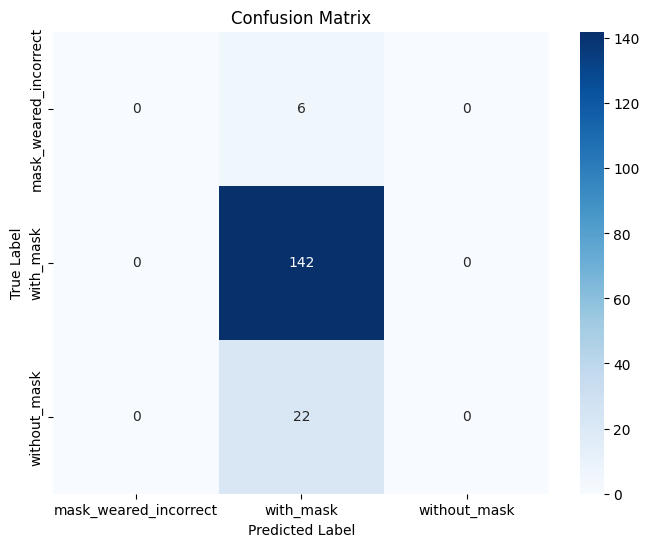

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Focal loss
# Focal loss 2017-ci ildə Lin et al. tərəfindən təqdim olunan və
# əsasən dengesiz təsnifat (class imbalance) problemlərini həll etmək üçün istifadə olunan xüsusi bir loss funksiyasıdır.
import tensorflow as tf

def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=3)
        epsilon = 1e-9
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.math.pow(1 - y_pred, gamma)
        loss = weight * cross_entropy
        return tf.reduce_sum(loss, axis=1)
    return focal_loss_fixed

model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=focal_loss(gamma=2., alpha=0.25),
    metrics=['accuracy']
)


In [ ]:
model1.fit(
    train_data,
    validation_data=valid_data,
    epochs=10,
    callbacks=[early_stopping]
)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 437ms/step - accuracy: 0.8127 - loss: 0.0798 - val_accuracy: 0.8353 - val_loss: 0.0781
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 385ms/step - accuracy: 0.8039 - loss: 0.0768 - val_accuracy: 0.8353 - val_loss: 0.0802
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 433ms/step - accuracy: 0.8251 - loss: 0.0657 - val_accuracy: 0.8353 - val_loss: 0.0929
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 441ms/step - accuracy: 0.8003 - loss: 0.0702 - val_accuracy: 0.8353 - val_loss: 0.0757
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 409ms/step - accuracy: 0.8191 - loss: 0.0589 - val_accuracy: 0.8353 - val_loss: 0.0830
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.8164 - loss: 0.0604 - val_accuracy: 0.8353 - val_loss: 0.1086
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 442ms/step - accuracy: 0.8199 - loss: 0.0594 - val_accuracy: 0.8353 - val_loss: 0.0983
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 486ms/step - accuracy: 0.8226 - loss: 0.0585 - val_accura

In [ ]:
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=focal_loss(gamma=1., alpha=0.5),
    metrics=['accuracy']
)
from sklearn.utils import class_weight
import numpy as np


all_labels = np.concatenate([y.numpy() for x, y in train_data], axis=0)

weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)

class_weights = dict(enumerate(weights))

model1.fit(
    train_data,
    validation_data=valid_data,
    epochs=10,
    class_weight=class_weights
)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 453ms/step - accuracy: 0.8347 - loss: 0.4559 - val_accuracy: 0.8353 - val_loss: 0.1613
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 390ms/step - accuracy: 0.7600 - loss: 0.4976 - val_accuracy: 0.2588 - val_loss: 0.3516
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 389ms/step - accuracy: 0.7653 - loss: 0.4196 - val_accuracy: 0.4294 - val_loss: 0.3106
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 361ms/step - accuracy: 0.7748 - loss: 0.4514 - val_accuracy: 0.7353 - val_loss: 0.2324
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.7779 - loss: 0.4730 - val_accuracy: 0.8353 - val_loss: 0.1590
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.7617 - loss: 0.3340 - val_accuracy: 0.8353 - val_loss: 0.2111
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 409ms/step - accuracy: 0.7262 - loss: 0.4455 - val_accuracy: 0.8353 - val_loss: 0.2672
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 348ms/step - accuracy: 0.7570 - loss: 0.3761 - val_accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[  0   6   0]
 [  1 141   0]
 [  0  21   1]]


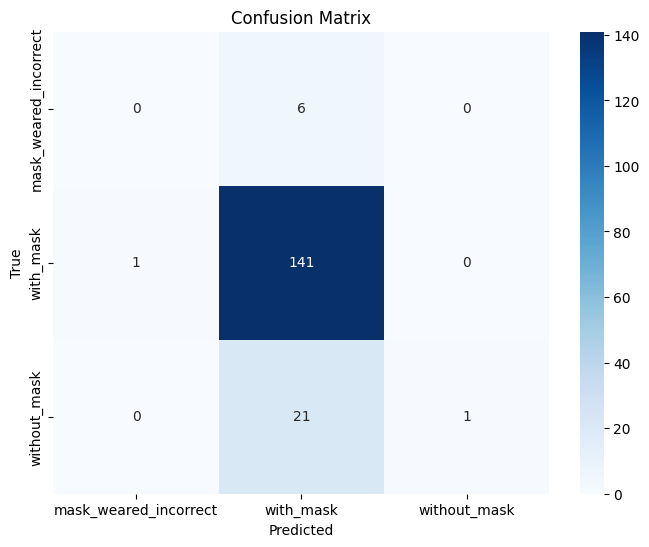

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_true = []
y_pred = []

for images, labels in valid_data:
    preds = model1.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))


cm = confusion_matrix(y_true, y_pred)
print(cm)


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#Pytorch

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split


datasets: Torchvision-un hazır datasetləri və dataset strukturları. ImageFolder kimi siniflər buradan gəlir.

transforms: Data üçün şəkil dəyişiklikləri (preprocessing, augmentation) üçün istifadə olunur.

DataLoader: Datasetdən minibatch-lər hazırlayan, training üçün iterator yaradan class.

random_split: Dataseti təsadüfi şəkildə train və validation kimi bölmək üçün istifadə olunur.

In [ ]:
data_dir = '/content/images'

In [ ]:
!ls /content/images

mask_weared_incorrect  with_mask  without_mask


In [ ]:
#augmentation
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [ ]:
full_dataset = datasets.ImageFolder(root=data_dir, transform=train_transforms)


ImageFolder kök qovluqdan şəkilləri sinif qovluqlarına görə oxuyur.

transform=train_transforms — yəni, hər şəkil yüklənəndə train augmentasiyası tətbiq olunur.


In [ ]:
train_size=int(0.8 * len(full_dataset))
val_size=len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

In [ ]:
val_dataset.dataset.transform = val_transforms

random_split nəticəsində yaranan val_dataset-in içində hələ də full_dataset saxlanılır.

Biz full_dataset-də transform kimi train transformları təyin etmişik.

Ona görə val_dataset üçün transformu val transformlarına dəyişirik, yoxsa val üçün augmentasiya davam edir.

Bu addım olmadan val datasında da augmentasiya gedər və nəticə səhv olar.

In [ ]:
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2) #paralel proseslərlə data yüklənməsi

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding=1)     # [B, 3, 224, 224] -> [B, 16, 224, 224] # Changed input channels to 3
    self.pool = nn.MaxPool2d(2, 2)                 # [B, 16, 224, 224] -> [B, 16, 112, 112]
    self.conv2 = nn.Conv2d(16, 32, 3, padding=1)   # [B, 16, 112, 112] -> [B, 32, 112, 112] -> pool -> [B, 32, 56, 56] # Adjusted spatial dimensions after pooling
    self.fc1 = nn.Linear(32 * 56 * 56, 128) # Adjusted input features for the first fully connected layer
    self.fc2 = nn.Linear(128, 3) # Output layer for 3 classes

  def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # 1st conv + relu + pool
        x = self.pool(F.relu(self.conv2(x)))   # 2nd conv + relu + pool
        x = x.view(-1, 32 * 56 * 56)              # flatten, Adjusted spatial dimensions
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
#loss
import torch.optim as optim
import torch

model2=CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

In [ ]:
# Training dövrü
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1, Loss: 1.5960
Epoch 2, Loss: 0.5402
Epoch 3, Loss: 0.4874
Epoch 4, Loss: 0.4120
Epoch 5, Loss: 0.3234


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = CNN().to(device)


In [ ]:
for epoch in range(5):
    model2.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)

    # --- Validation ---
    model2.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model2(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1} | Loss: {avg_loss:.4f} | Val Accuracy: {accuracy:.2f}%")


Epoch 1 | Loss: 1.0961 | Val Accuracy: 32.16%
Epoch 2 | Loss: 1.0955 | Val Accuracy: 32.16%
Epoch 3 | Loss: 1.0956 | Val Accuracy: 32.16%
Epoch 4 | Loss: 1.0960 | Val Accuracy: 32.16%
Epoch 5 | Loss: 1.0959 | Val Accuracy: 32.16%


Classification Report:
                       precision    recall  f1-score   support

mask_weared_incorrect       0.03      0.33      0.05         6
            with_mask       0.70      0.38      0.49       132
         without_mask       0.14      0.09      0.11        33

             accuracy                           0.32       171
            macro avg       0.29      0.27      0.22       171
         weighted avg       0.57      0.32      0.40       171

Confusion Matrix:
[[ 2  3  1]
 [64 50 18]
 [12 18  3]]


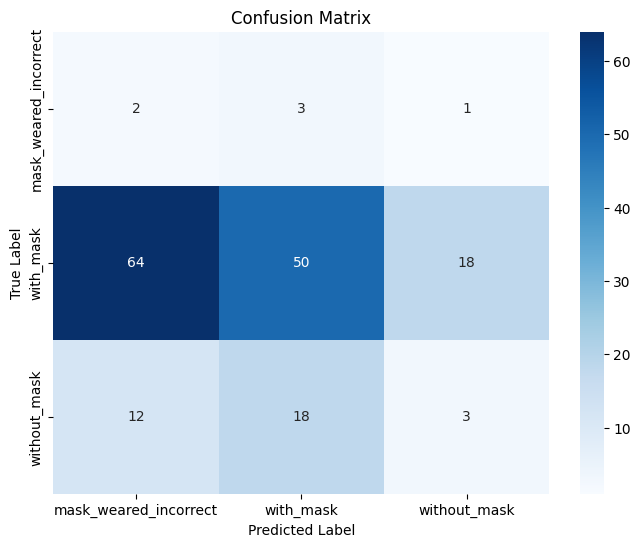

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

all_preds = []
all_labels = []

model2.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model2(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=full_dataset.classes))

print("Confusion Matrix:")
cm = confusion_matrix(all_labels, all_preds)
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=full_dataset.classes,
            yticklabels=full_dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Focal loss
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        # CrossEntropyLoss daxilində softmax və log-softmax var, ona görə biz logits qəbul edirik

    def forward(self, inputs, targets):
        """
        inputs: [batch_size, num_classes], logits
        targets: [batch_size], class indices (integers)
        """
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')  # individual cross-entropy losses
        pt = torch.exp(-ce_loss)  # pt = prob modelin doğru sinifə verdiyi ehtimal

        if self.alpha is not None:
            if isinstance(self.alpha, (list, torch.Tensor)):
                alpha_t = torch.tensor(self.alpha).to(inputs.device)[targets]
            else:
                alpha_t = self.alpha
        else:
            alpha_t = 1.0

        focal_loss = alpha_t * (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss


In [ ]:
model3 = CNN()
criterion = FocalLoss(gamma=2, alpha=[0.25, 0.25, 0.5])

optimizer = torch.optim.Adam(model3.parameters(), lr=1e-3)

In [ ]:
for epoch in range(5):
    model3.train()
    running_loss = 0.0
    running_corrects = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += (preds == labels).sum().item()
        total_train += labels.size(0)

    epoch_loss = running_loss / total_train
    epoch_acc = 100 * running_corrects / total_train

    # --- Validation ---
    model2.eval()
    val_loss = 0.0
    val_corrects = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model2(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            val_corrects += (preds == labels).sum().item()
            total_val += labels.size(0)

    val_epoch_loss = val_loss / total_val
    val_epoch_acc = 100 * val_corrects / total_val

    print(f"Epoch {epoch+1} | "
          f"Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.2f}% | "
          f"Val Loss: {val_epoch_loss:.4f} | Val Acc: {val_epoch_acc:.2f}%")


Epoch 1 | Train Loss: 0.1374 | Train Acc: 36.80% | Val Loss: 0.1467 | Val Acc: 32.16%
Epoch 2 | Train Loss: 0.1374 | Train Acc: 36.80% | Val Loss: 0.1467 | Val Acc: 32.16%
Epoch 3 | Train Loss: 0.1374 | Train Acc: 36.80% | Val Loss: 0.1467 | Val Acc: 32.16%
Epoch 4 | Train Loss: 0.1374 | Train Acc: 36.80% | Val Loss: 0.1467 | Val Acc: 32.16%
Epoch 5 | Train Loss: 0.1374 | Train Acc: 36.80% | Val Loss: 0.1467 | Val Acc: 32.16%


In [ ]:
#Transfer learning
import torch
import torch.nn as nn
import torchvision.models as models


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

base_model = models.resnet18(pretrained=True)  # pretrained=True ImageNet üzərində öyrədilib

# Bütün qatları dondur ki, bu qatların çəkiləri öyrənilməsin
for param in base_model.parameters():
    param.requires_grad = False

# TensorFlow/Keras:
# Modelin qatlarının dondurulması üçün qatın .trainable atributunu False edirsən.
# Bu, həmin qatın tətbiq zamanı ağırlıqlarının yenilənməməsini (backprop üçün gradient hesablamağı dayandırmaq) təmin edir.
# PyTorch:
# Burada isə daha aşağı səviyyədə işləyirsən. Modelin parametrləri tensorlardır və onların requires_grad atributu var.
# Bu atribut False olarsa, PyTorch həmin tensorun gradientini hesablamaqdan imtina edir (dondurur).

num_classes = 3
in_features = base_model.fc.in_features  # əvvəlki fc qatının input ölçüsü

base_model.fc = nn.Linear(in_features, num_classes)  # 3 sinif üçün çıxış qatını yenilə


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 191MB/s]


In [ ]:
model3 = base_model.to(device)


In [ ]:
criterion = FocalLoss(gamma=2., alpha=0.25)
optimizer = optim.Adam(model3.fc.parameters(), lr=1e-4)  # fc qatının parametrlərini öyrət


In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
    model3.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model3(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Validation
    model3.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model3(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")


Epoch [1/5] Train Loss: 0.0741, Train Acc: 77.27% | Val Loss: 0.1008, Val Acc: 77.19%
Epoch [2/5] Train Loss: 0.0687, Train Acc: 81.38% | Val Loss: 0.0890, Val Acc: 76.61%
Epoch [3/5] Train Loss: 0.0657, Train Acc: 80.65% | Val Loss: 0.0862, Val Acc: 77.19%
Epoch [4/5] Train Loss: 0.0630, Train Acc: 80.21% | Val Loss: 0.0815, Val Acc: 77.19%
Epoch [5/5] Train Loss: 0.0601, Train Acc: 81.23% | Val Loss: 0.0794, Val Acc: 77.19%


In [ ]:
# Save best model
torch.save(model3.state_dict(), "mask_model.pth")


In [ ]:
!!pip install onnx


['Collecting onnx',
 '  Downloading onnx-1.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.9 kB)',
 'Requirement already satisfied: numpy>=1.22 in /usr/local/lib/python3.11/dist-packages (from onnx) (2.0.2)',
 'Requirement already satisfied: protobuf>=4.25.1 in /usr/local/lib/python3.11/dist-packages (from onnx) (5.29.5)',
 'Requirement already satisfied: typing_extensions>=4.7.1 in /usr/local/lib/python3.11/dist-packages (from onnx) (4.14.1)',
 'Downloading onnx-1.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)',
 '\x1b[?25l   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/17.6 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K   \x1b━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b4.3/17.6 MB\x1b \x1b129.4 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━\x1b \x1b11.5/17.6 MB\x1b \x1b186.3 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━

In [ ]:
import torch

dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Modelin gözlədiyi input ölçüsü
model3.eval()

torch.onnx.export(model3, dummy_input, "model.onnx", input_names=['input'], output_names=['output'])
